In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv('Downloads/abalone.csv')
dataset.dropna()
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
X_data = dataset.iloc[:,0:8].values
X_data[0:5]

array([['M', 0.455, 0.365, 0.095, 0.514, 0.2245, 0.10099999999999999,
        0.15],
       ['M', 0.35, 0.265, 0.09, 0.2255, 0.0995, 0.0485, 0.07],
       ['F', 0.53, 0.42, 0.135, 0.677, 0.2565, 0.1415, 0.21],
       ['M', 0.44, 0.365, 0.125, 0.516, 0.2155, 0.114, 0.155],
       ['I', 0.33, 0.255, 0.08, 0.205, 0.0895, 0.0395, 0.055]],
      dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
X_data[:,0] = labelenc.fit_transform(X_data[:,0])

In [5]:
X_data[0:5,:]

array([[2, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.10099999999999999, 0.15],
       [2, 0.35, 0.265, 0.09, 0.2255, 0.0995, 0.0485, 0.07],
       [0, 0.53, 0.42, 0.135, 0.677, 0.2565, 0.1415, 0.21],
       [2, 0.44, 0.365, 0.125, 0.516, 0.2155, 0.114, 0.155],
       [1, 0.33, 0.255, 0.08, 0.205, 0.0895, 0.0395, 0.055]], dtype=object)

In [6]:
Y_data = dataset.iloc[:,8].values
Y_data[0:5]

array([15,  7,  9, 10,  7])

In [7]:
Y_data.shape

(4177,)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data,test_size=0.3)

In [23]:
from sklearn.linear_model import Ridge
classifier = Ridge(alpha=0.2)
classifier.fit(x_train,y_train)
classifier.score(x_train,y_train)

0.5223730233506769

In [24]:
classifier.score(x_test,y_test)

0.5376953489926732

In [25]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(classifier,x_test,y_test,cv=5)
print(results)

[0.55039328 0.53015364 0.56842666 0.57232694 0.46327462]


In [15]:
#In the best case scenario we got a accuracy score of 57%

In [26]:
x_pred = np.array([[2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150]])
classifier.predict(x_pred)

array([12.09003053])

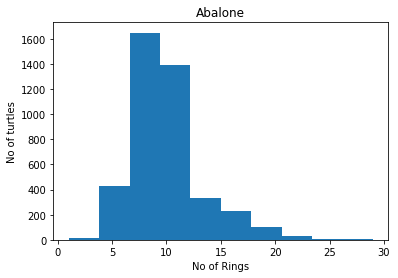

In [31]:
plt.hist(Y_data,bins=10)
plt.ylabel('No of turtles')
plt.xlabel('No of Rings')
plt.title('Abalone')
plt.show()